In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import scipy.optimize as opt
import scipy.signal as sig
import scipy.integrate as sciint
import scipy.linalg as la
from functools import partial
from itertools import cycle
import os

# Mine
from wilson_cowan_2d.simulations import concrete_wc_kernel as wck
from wilson_cowan_2d.simulations import wc_params as wcp
from wilson_cowan_2d.simulations.nonlinear_functions import decreasing_exponential, ssn_power_law
from wilson_cowan_2d.analysis.nulclines import calc_cross_points, calc_nulclines_crosspoints
import wilson_cowan_2d.analysis.nulclines as nuc
from wilson_cowan_2d.utils import make_counter

from IPython.display import HTML, clear_output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

%load_ext autoreload
%autoreload 2

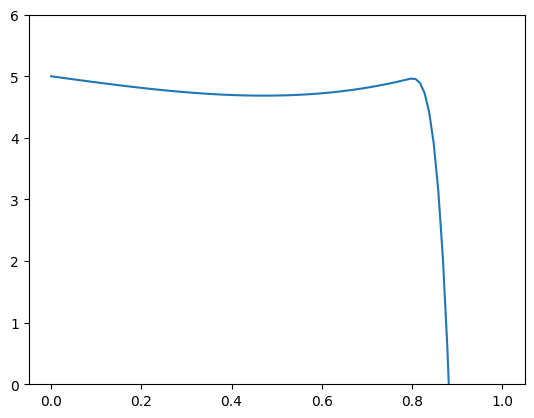

In [223]:
n = 3
k = 1

A = np.array(( [1.5, 1]
              ,[10, 1]))
Θ = np.array([-5, -0.01])


xrang = np.linspace(0,1,100)
param = wcp.SSNDefaultParams(n=n, k=k, size = 2**8,
                             τ = np.array([τe, τi]))  #, A=A, Θ = Θ)

def F(z):
    return ssn_power_law(z, param.n, param.A[0,0])\
    - ssn_power_law(P(z), param.n, param.A[0,1])\
    - z - param.Θ[0]

def P(z):
    return 1/param.A[0,1] * \
    (ssn_power_law(z, param.n, la.det(param.A * np.array(([1,-1], [1, -1]))))\
    + param.A[1,1]*(z + param.Θ[0])\
    - param.A[0,1]*param.Θ[1])


_ = plt.plot(xrang, F(xrang))
_ = plt.ylim(0,6)

[[-10.11010997   0.68650003  66.02788005]
 [-10.11010997   5.14832244 100.        ]]


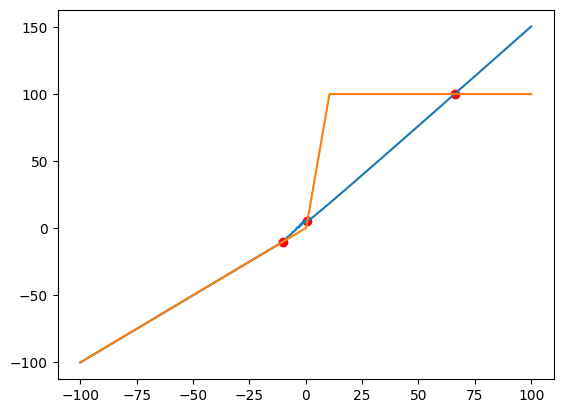

In [307]:
τe = 1
τi = 40

n = 3
k = 1

param = wcp.SSNDefaultParams(n=n, k=k, size = 2**8,
                             τ = np.array([τe, τi]),
                             A = A, Θ = Θ)
# param.Θ = np.array([0.08, 0.4])

u,v,cps = calc_nulclines_crosspoints(param, interp_prec=1e-5,
                                     fit_points=1_000,t_rang=(-100, 100))
_ = plt.plot(*u)
_ = plt.plot(*v)
_ = plt.scatter(*cps, c='r')
# _ = plt.xlim(0, 2)
# _ = plt.ylim(0, 2)
print(cps)

In [308]:
inp = (np.array(0.6865), np.array(5.148322))

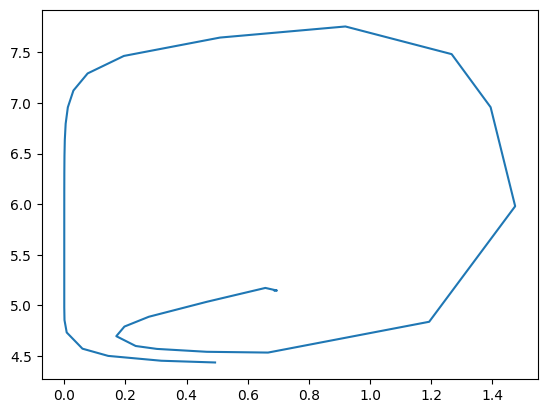

In [314]:
test = wck.WCUnif(inp, param)

res = test((0,32))
_ = plt.plot(res.u, res.v)

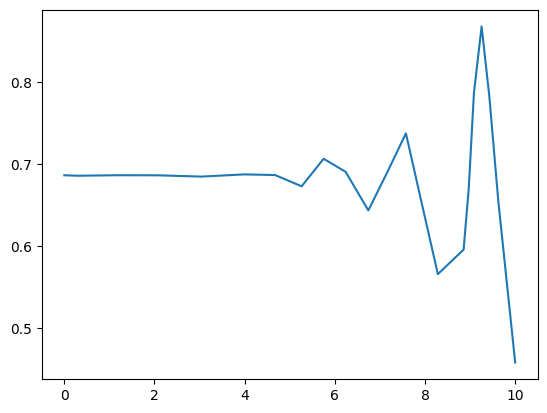

In [271]:
_ = plt.plot(res.t, res.u)

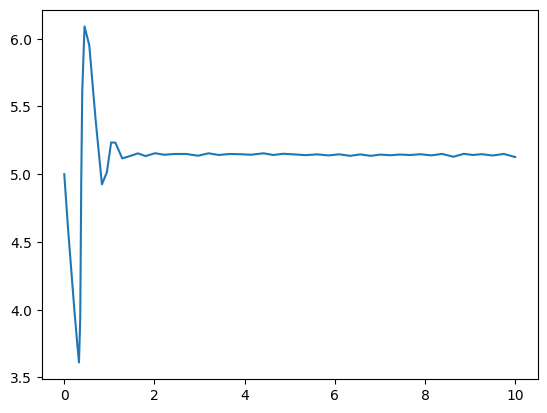

In [221]:
_ = plt.plot(res.t, res.v)